In [14]:
import json
import matplotlib.pyplot as plt
import matplotlib

In [9]:
file_path = "./merged_file.json"

# Read JSON data from the file
with open(file_path, 'r') as file:
    json_data = file.read()

In [10]:
data = json.loads(json_data)

# Initialize lists for width and height
width_list = []
height_list = []

# Extract width and height from each item
for item in data:
    for slot in item['item']['slots']:
        width_list.append(slot['width'])
        height_list.append(slot['height'])

# Output width and height lists
print("Width List:", width_list)
print("Height List:", height_list)

Width List: [951, 1429, 1311, 924, 838, 1609, 1412, 951, 1361, 2343, 1196, 1185, 1491, 990, 951, 789, 906, 939, 2338, 1311, 1224, 769, 1224, 2878, 985, 828, 1301, 951, 1562, 664, 1025, 2881, 1026, 2343, 2336, 768, 1640, 983, 905, 1420, 1429, 1356, 1420, 1492, 950, 1412, 1058, 1413, 830, 2409, 980, 1185, 2032, 930, 1607, 1417, 2409, 829, 951, 2424, 949, 1592, 981, 990, 1225, 972, 1458, 2406, 2424, 827, 2331, 2642, 1315, 970, 790, 789, 841, 1615, 2425, 1376, 949, 1199, 790, 990, 1383, 1318, 2262, 982, 1443, 971, 1591, 2410, 1371, 2834, 831, 2408, 1190, 2425, 1057, 980, 2880, 991, 768, 2884, 1414, 1240, 1026, 1318, 1312, 1077, 1297, 974, 948, 1185, 1386, 2426, 1383, 1008, 3044, 769, 831, 2746, 906, 1440, 1063, 2636, 2635, 1076, 1210, 3044, 702, 1025, 1153, 2966, 705, 1108, 1225, 945, 598, 1139, 2024, 1569, 664, 2036, 1198, 738, 2871, 661, 1224, 1177, 1218, 2844, 1063, 1197, 907, 2033, 736, 989, 1063, 1557, 2626, 1241, 974, 596, 1062, 945, 905, 2966, 1009, 1064, 1550, 1063, 2584, 597, 1198

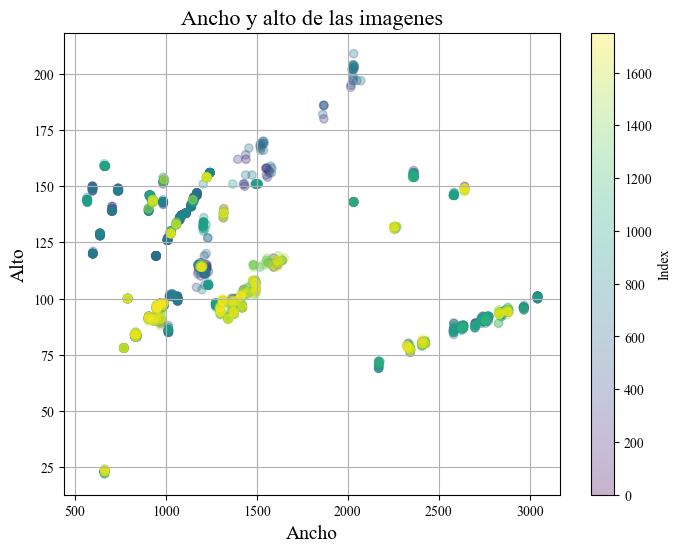

In [28]:
matplotlib.rcParams['font.family'] = 'Times New Roman'
colors = range(len(width_list))
plt.figure(figsize=(8, 6))
plt.scatter(width_list, height_list, c=colors, cmap='viridis', alpha=0.3)
plt.colorbar(label='Index')
plt.title('Ancho y alto de las imagenes', fontsize=16)
plt.xlabel('Ancho', fontsize=14)
plt.ylabel('Alto', fontsize=14)
plt.grid(True)
plt.show()

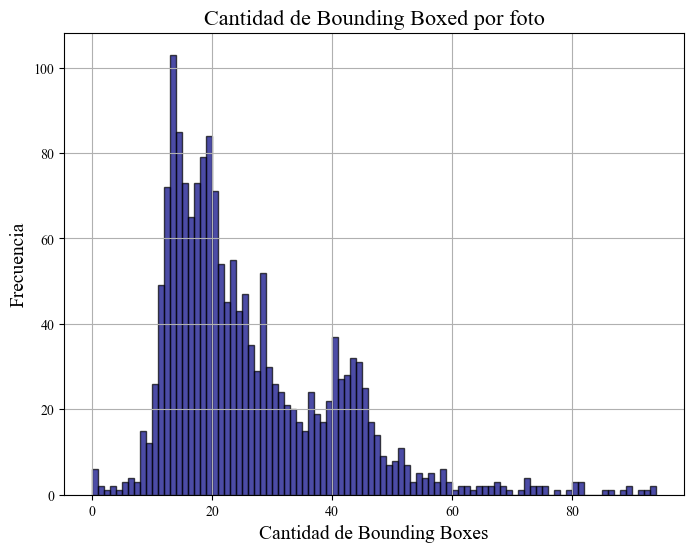

In [29]:
bounding_box_counts = []

for item in data:
    bounding_boxes = item.get("annotations", [])
    bounding_box_counts.append(len(bounding_boxes))

plt.figure(figsize=(8, 6))
plt.hist(bounding_box_counts, bins=range(min(bounding_box_counts), max(bounding_box_counts) + 1), color='navy', edgecolor='black', alpha=0.7)
plt.title('Cantidad de Bounding Boxes por foto', fontsize=16)
plt.xlabel('Cantidad de Bounding Boxes', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()

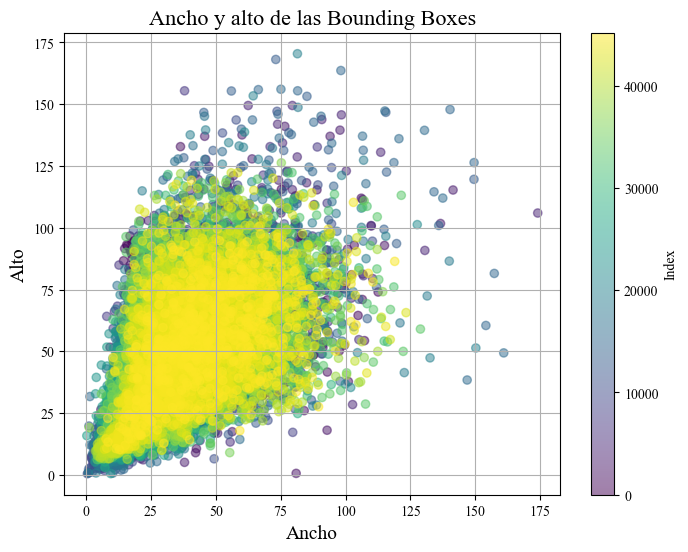

In [27]:
bounding_box_widths = []
bounding_box_heights = []

for item in data:
    annotations = item.get("annotations", [])
    for annotation in annotations:
        bounding_box = annotation.get("bounding_box", {})
        width = bounding_box.get("w", 0)
        height = bounding_box.get("h", 0)
        bounding_box_widths.append(width)
        bounding_box_heights.append(height)

plt.figure(figsize=(8, 6))
plt.scatter(bounding_box_widths, bounding_box_heights, c=range(len(bounding_box_widths)), cmap='viridis', alpha=0.5)
plt.title('Ancho y alto de las Bounding Boxes', fontsize=16)
plt.xlabel('Ancho', fontsize=14)
plt.ylabel('Alto', fontsize=14)
plt.grid(True)
plt.colorbar(label='Index')
plt.show()